In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
from torch import nn

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists skipping download")
else:
    print(f"{image_path} does not exist, creating one")
    image_path.mkdir(parents=True,exist_ok=True)
    

with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza,steak,sushi data")
    f.write(request.content)
    
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping pizza,steak and sushi data")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one
Unzipping pizza,steak and sushi data


In [5]:
import os

def walk_through_dir(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [7]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/sushi/46797.jpg
Image class: sushi
Image height: 384
Image width: 512


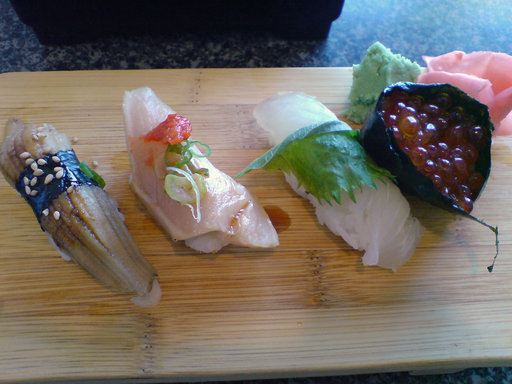

In [55]:
import random
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
# print(random_image_path)

image_class = random_image_path.parent.stem
# print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 383.5, -0.5)

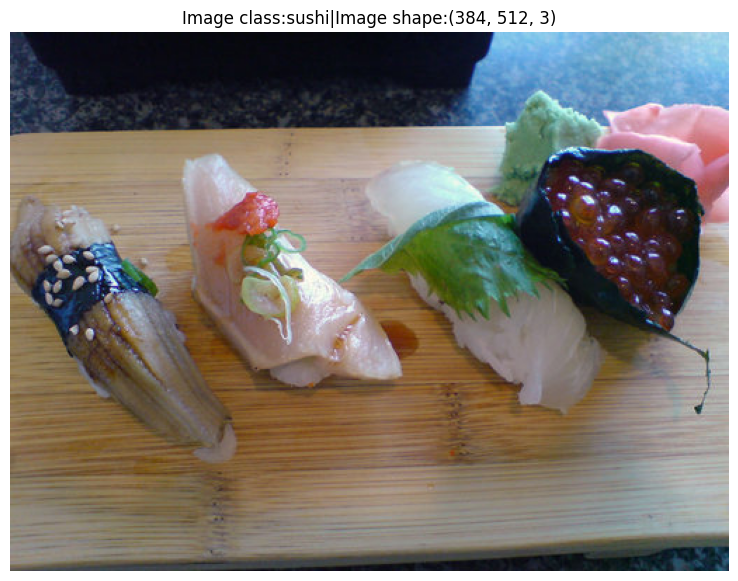

In [56]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class:{image_class}|Image shape:{img_as_array.shape}")
plt.axis(False)

In [53]:
img_as_array

array([[[ 21,  33,  21],
        [ 19,  31,  19],
        [ 21,  33,  21],
        ...,
        [ 28,  40,  28],
        [ 32,  44,  32],
        [ 34,  46,  34]],

       [[ 22,  34,  22],
        [ 20,  32,  20],
        [ 21,  33,  21],
        ...,
        [ 28,  40,  28],
        [ 28,  40,  28],
        [ 28,  40,  28]],

       [[ 28,  40,  26],
        [ 26,  38,  24],
        [ 26,  38,  24],
        ...,
        [ 17,  27,  18],
        [ 13,  25,  15],
        [ 12,  24,  14]],

       ...,

       [[127, 130, 119],
        [124, 127, 116],
        [124, 127, 116],
        ...,
        [ 22,  10,   0],
        [ 22,  10,   0],
        [ 22,  10,   0]],

       [[124, 127, 116],
        [122, 125, 114],
        [123, 126, 115],
        ...,
        [ 23,  11,   0],
        [ 23,  11,   0],
        [ 23,  11,   0]],

       [[120, 123, 112],
        [120, 123, 112],
        [121, 124, 113],
        ...,
        [ 23,  11,   0],
        [ 24,  12,   0],
        [ 25,  13,   1]]

In [57]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [77]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [78]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [79]:
data_transform(img)

tensor([[[0.1373, 0.0824, 0.0431,  ..., 0.6549, 0.6353, 0.6275],
         [0.1569, 0.1294, 0.0510,  ..., 0.6000, 0.6078, 0.6118],
         [0.1490, 0.1569, 0.0824,  ..., 0.5843, 0.5843, 0.5843],
         ...,
         [0.5725, 0.5608, 0.5529,  ..., 0.1333, 0.1098, 0.1176],
         [0.5686, 0.5686, 0.5608,  ..., 0.0941, 0.0667, 0.1059],
         [0.4706, 0.4510, 0.4196,  ..., 0.0784, 0.0745, 0.1294]],

        [[0.1804, 0.1059, 0.0431,  ..., 0.8314, 0.8314, 0.8275],
         [0.1882, 0.1529, 0.0588,  ..., 0.8118, 0.8275, 0.8235],
         [0.1922, 0.1961, 0.0980,  ..., 0.8039, 0.8078, 0.8039],
         ...,
         [0.5451, 0.5451, 0.5373,  ..., 0.2157, 0.2039, 0.2235],
         [0.5373, 0.5412, 0.5333,  ..., 0.2000, 0.1647, 0.2353],
         [0.4353, 0.4196, 0.4000,  ..., 0.1882, 0.1765, 0.2627]],

        [[0.2824, 0.1804, 0.1020,  ..., 0.9137, 0.9216, 0.9255],
         [0.2941, 0.2549, 0.1216,  ..., 0.9176, 0.9216, 0.9255],
         [0.3020, 0.2980, 0.1686,  ..., 0.9255, 0.9216, 0.

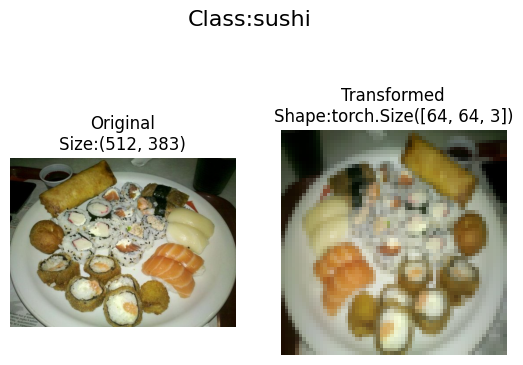

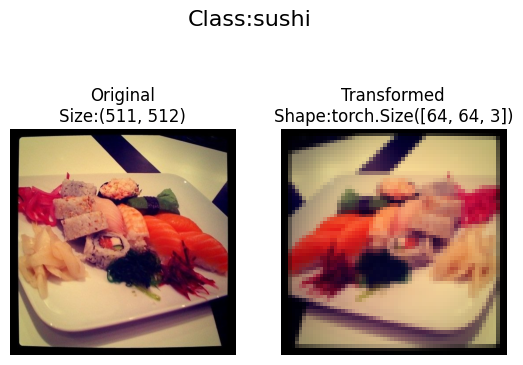

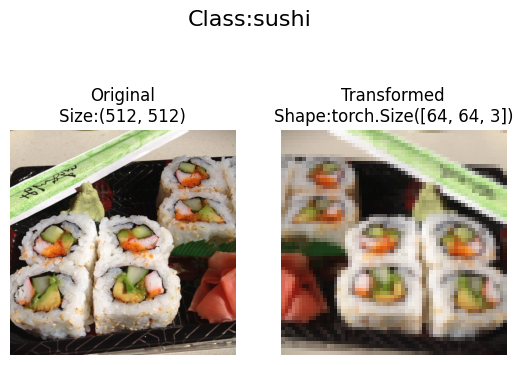

In [83]:
def plot_transformed_images(image_paths,transform,n=3,seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize:{f.size}")
            ax[0].axis(False)
            
            
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class:{image_path.parent.stem}",fontsize=16)
            
plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,n=3,seed=None)
    

In [84]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data=datasets.ImageFolder(root=test_dir,
                              transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [86]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [87]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}